Here's the packages you typically need to import: 

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import random
import math

# Import a csv from the data folder
df = pd.read_csv("data/title.csv")

https://github.com/lperconti/phase2-code-challenge-review/blob/solution/P2-Code-Challenge-Review.ipynb


* T-Test
* Simple and Multiple Linear Reg
    * model = ols(Y~X, df).fit() ##LOOK AT CHECKPOINT##
    * model.summary()
* Bayes’ Theorem

PROBABILITY CHEAT SHEET: https://medium.com/data-comet/probability-rules-cheat-sheet-e24b92a9017f

See cheat sheet for probability rules and formulas. 

## Distributions

!shape and spread of data - 

A probability Distribution is a statistical function that describes all the possible values and likelyhoods that a random variable can take ithin a given range. 

**Discrete**: finite possibilities in values. (# of sides on a dice)
**Continuous**: outcomes that fall on a continuum 

Normal Distribution is super useful. 68-95-99.7 rule

Probability distributions can also be used to create **cumulative distribution functions (CDFs)**, which adds up the probability of occurrences cumulatively and will always start at zero and end at 100%.

## standard deviation: σ and Variance
**Standard Deviation**: a measure of the dispersion of a dataset relative to its mean. Square Root of the variance

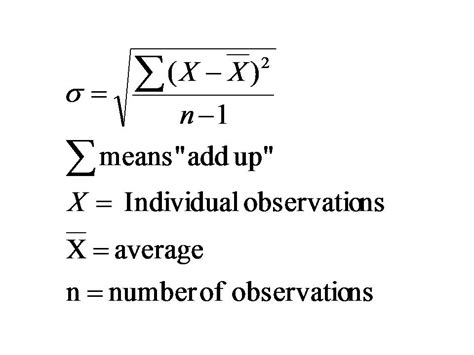

A low standard deviation indicates that the values tend to be close to the mean (also called the expected value) of the set, while a high standard deviation indicates that the values are spread out over a wider range.

**ST.DEV Numpy Calculation**(array = array of list values): array.std() #this calculates the population std by default

**DT.DV Pandas Calcuation**(df = data frame): df.std() #this calculates the sample standard deviation by default (normalizes N-1), do get population standard deviation pass ddof = 0 to the std() function

Standard Deviation vs. **Variance**
**Variance** is derived by taking the mean of the data points, subtracting the mean from each data point individually, squaring each of these results, and then taking another mean of these squares. Standard deviation is the square root of the variance.

The **variance** helps determine the data's spread size when compared to the mean value.

## Z score quick and dirty

Z score is a measurement that describes a value's relationship to the mean of a group of values.

** z = (X – μ) / σ ** 

or,

** z-score = (Observed value - mean) / (st. dev.) **

where:

X = single raw data value, μ = population mean, σ = population standard deviation (or σ - 1 for sample)

1) First you should state your Alt. and Null Hypotheses 
2) Specify a Significance Level (alpha) 
3) **Calculating Z-Score in Python** - see scipy and pandas below: 
4) Calculate the P Score (use table online https://www.statology.org/z-table/ how to use it with examples: https://www.statology.org/how-to-use-z-table/ 
    OR stats.norm.cdf(z)* *remember to calculate 1 - if you're looking left on the curve)
5) Interpret P-Value - reject null hypothesis or reject alt. hypothesis. 

**Scipy Stats**: (use for arrays) 
scipy.stats.zscore(a, axis=0, ddof=0, nan_policy=’propagate’)
where:
a: an array like object containing data
axis: the axis along which to calculate the z-scores. Default is 0. Use 1 if you're working with a multi-dimensional array ([list of numbers], [list of numbers], [] etc)
ddof: degrees of freedom correction in the calculation of the standard deviation. Default is 0.

**Pandas DF**: calculates z-score of indibidual values by column: 

DF.apply(stats.zscore)

Right - Tailed Test: Alternative Hypothesis - μ > z value
Left - tailed Test: Alt. Hyp μ < value
Two-Tailed Test: μ != value

## Question is asking for portion of population getting more or less than a variable

1) import scipy stats

from scipy import stats

2) More than is a right side of the distribution question, Less Than is a left side of distribution. 
    
    more than = (1 - stats.norm().cdf(z_score))
    less than = (stats.norm().cdf(z_score)) #to find z score look above


## Finding the Standard Error of the Mean

The standard error of the mean is $\dfrac{S}{\sqrt{n}}$, where $S$ is the sample standard deviation and $n$ is the sample size.


In [ ]:
#calculating Standard Error:

# Get the sample standard deviation
sample_stdev = sample.std(ddof=1)

# Calculate the standard error using the formula described above
se = sample_stdev/math.sqrt(sample_size)

## Confidence Intervals

Confidence Interval is a range of values above and below the point estimate that captures the true population parameter at some predetermined confidence level. If we want to have a 95% chance of capturing the true population parameter with a point estimate and a corresponding confidence interval, we would set the confidence level to 95%. Higher confidence levels result in wider confidence intervals.

**Confidence Interval Calculation:** calculated by taking a point estimate and then adding and subtracting a margin of error to create a range.

The **margin of error** for a known population standard deviation is:

> **Margin of Error = z ∗ σ / √n**

Where σ (sigma) is the population standard deviation, n is sample size, and z is a number known as the z-critical value.

**If we want our confidence level — i.e., how confident we are that the true value of the parameter lies within the confidence interval — to be:**
- **90%**: The z-score multiplier should be **z = 1.645**
- **95%**: The z-score multiplier should be **z = 1.96**
- **99%**: The z-score multiplier should be **z = 2.575**

get z-critical values with `stats.norm.ppf()`

> **`stats.norm.ppf(q, loc=0, scale=1)`**	is a percent point function (inverse of cdf — percentiles).

### Another way to Confidence Interval: 

In [ ]:
#use scipy stats to calculate confidence interval: 
# First need to calculate the standard error
sterr = std / (n ** 0.5)
stats.t.ppf()
ci = stats.t.interval(
    alpha=0.95,         # Confidence level
    df=(sample_size - 1), # Degrees of freedom
    loc=sample_mean,    # Sample mean
    scale=se            # Standard error - see above

### Interpret the 95% Confidence Interval that you derived in the above question

A 95% confidence interval means that there is a 95% chance for the interval to contain the true population mean. In this case, that means there is a 95% chance that the true mean of the distribution of hours of sleep likely for this Freshman is between 6.6 and 9.4 hours.

## T Distribution
T-distribution, t-distribution

When you: 
A) don't know the population mean and/or,
B) have a sample size of 30 or less! 

The T-distribution is a useful way to represent sampling distribution in the above scenarios. There's less info (smaller sample) to confidently use the normal distribution (z score, etc.)

T-distributions are similar to the normal distribution in shape but have heavier tails. T-distributions also have a parameter known as degrees of freedom. The higher the degrees of freedom, the closer the distribution resembles that of the normal distribution.
T distributions have 'heavier' or 'fatter' tails and have a greater chance for extreme values. 

Heaviness of tails is determined by the **Degrees of freedom** 

In [ ]:
import scipy.stats as stats

x_bar = np.mean(df)
s = np.std(df, ddof = 1) #ddof = 1 for sample

#Min and Max of Confidence Interval
stats.t.interval(alpha = 0.95,  # Confidence level
                 df= len(df)-1, # Degrees of freedom
                 loc = x_bar,   # Sample mean
                 scale = s)     # Standard deviation estimate

## Hypothesis Testing

## Null vs alternative hypothesis

**Null Hypothesis** = H0 = There is NOTHING, no difference. The null hypothesis 𝐻0 is what we would expect if there is no difference from our sample to our comparison group (population in many cases).

**Alternative Hypothesis** = Ha or H1 = the sample is different from the comparison group. It is essentially the opposite of the null hypothesis (there is an effect).

## Type one and two ERRORS

**Type I Error (FP)**: We reject the null hypothesis, when in fact we should have failed to reject the null. Type I error is usually represented as  𝛼 , which is the probability of rejecting the null hypothesis when it is in fact true. False Positive

**Type II Error** (FN): We fail to reject the null, when in fact we should have rejected the null. Type II error is represented as  𝛽 ; it is the probability of failing to reject the null hypothesis when it is in fact false. False Negative 

## Defining power (1-𝛃)

When designing an experiment, scientists will frequently choose a power level they want for an experiment and from that obtain their type II error rate.

_Power_ = 1 - $\beta$

Beta is the probability of a false negtive. When Beta goes up, power of the test goes down (test is less accurate). HIGH POWER is GOOD 

free online power calculator https://clincalc.com/Stats/Power.aspx


We can use `power_analysis.solve_power` from `statsmodels` to find the sample size you need.

Examples of power tables:
- [full power table](http://www.pilesofvariance.com/Chapter13/Cohen_Power_Tables.pdf)

Need to read and do lab: https://learning.flatironschool.com/courses/4258/assignments/143727?module_item_id=301608

## Alpha and Beta

**Alpha ($\alpha$):** is the probability of a Type I error i.e. finding a difference when a difference does not exist. 

Most medical literature uses an alpha cut-off of 5% (0.05), indicating a 5% chance that a significant difference is actually due to chance and is not a true difference. 

**Beta ($\beta$):** is the probability of a Type II error i.e. not detecting a difference when one actually exists. 

Beta is directly related to study power (Power = $1 - \beta$). Most medical literature uses a beta cut-off of 20% (0.2), indicating a 20% chance that a significant difference is missed. 

## Effect Size 

um ... stuff goes here ? https://learning.flatironschool.com/courses/4258/assignments/143727?module_item_id=301608

## P Value P-value pvalue

P value is the measure of the probability that an observed difference could ahve occurred just by random chance. 

An approach to probability testing. 

**Alpha level** is how comfortable we are with getting a false positive. It's typical to set an alpha level of 0.05 or 5%

**Comparing P Value to Alpha**: 

P Value < alpha = reject the null : This is significant! 

P Value > alpha = fail to reject null 

If the P-value is less than alpha we reject the null. This mean's this finding is significant! significant finding = RARE finding (outside 3 or -3 standard deviation) - this is what Null says

## Steps of a Hypothesis Test
Below are the general steps of the hypothesis test (we'll focus on the one-sample 𝑧-test)

1) State the null hypothesis and the alternative hypothesis

2) Specify significance level (𝛼) alpha is the probability of rejecting null even though its true (!)

The smaller the value, the more "weirdness" we're willing to accept before reject the null hypothesis.

If the probability of observing a weird value (our sample) is smaller than 𝛼, then we will reject the null-hypothesis.

Typically we choose 𝛼 to be 0.05 which means that we have to observe a sample that would occur less than 5% of the time if the null hypothesis is true.

3) Calculate test statistic (z-statistic)  𝑧=𝑥¯−𝜇𝜎  se = 900 / np.sqrt(40) se

4) Calculate p-value p = 1 - CDF(z-stat)

Probability we'd find this value given null is true

1 - scipy.stats.norm.cdf(z_score)* stats.norm.cdf(z)

return the area to the right if it's 1 - *return area to left if just the formula *5) Interpret p-value (reject or fail to reject the null hypothesis)**

## two tailed T test: 

stats.ttest_ind(sample1, sample2).pvalue


## Bayes' Theorem

https://github.com/lperconti/dsc-chi-warmup-bayes/tree/solution

Law of conditional probability

P(A) = P(A|B) × P(B) + P(A|not B) × P(not B)

P(B) = P(B|A) × P(A) + P(B|not A) × P(not A)

P(B|A) = P(A|B) * P(B)/P(A)

You'll be asked to find probablility of A or B or one given the other



Just conditional probability: 
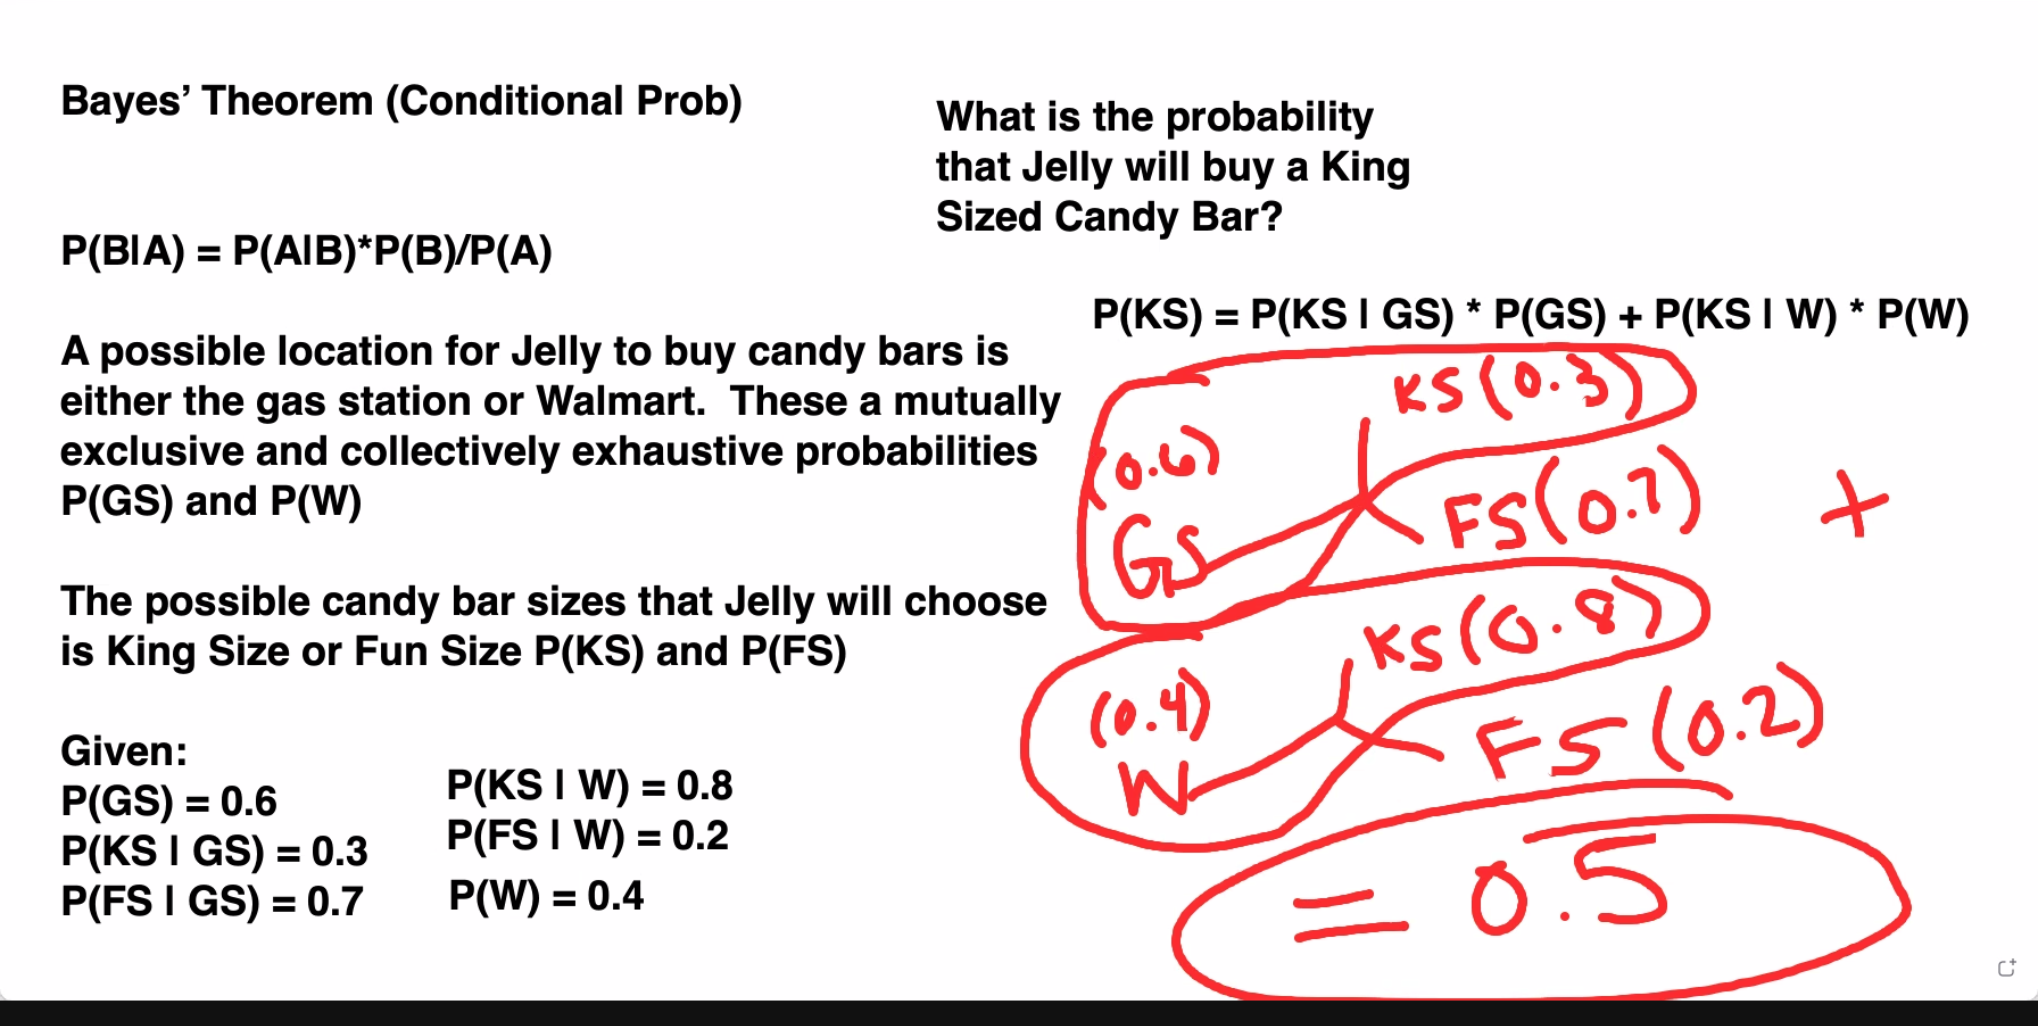

Bayes Theorem:
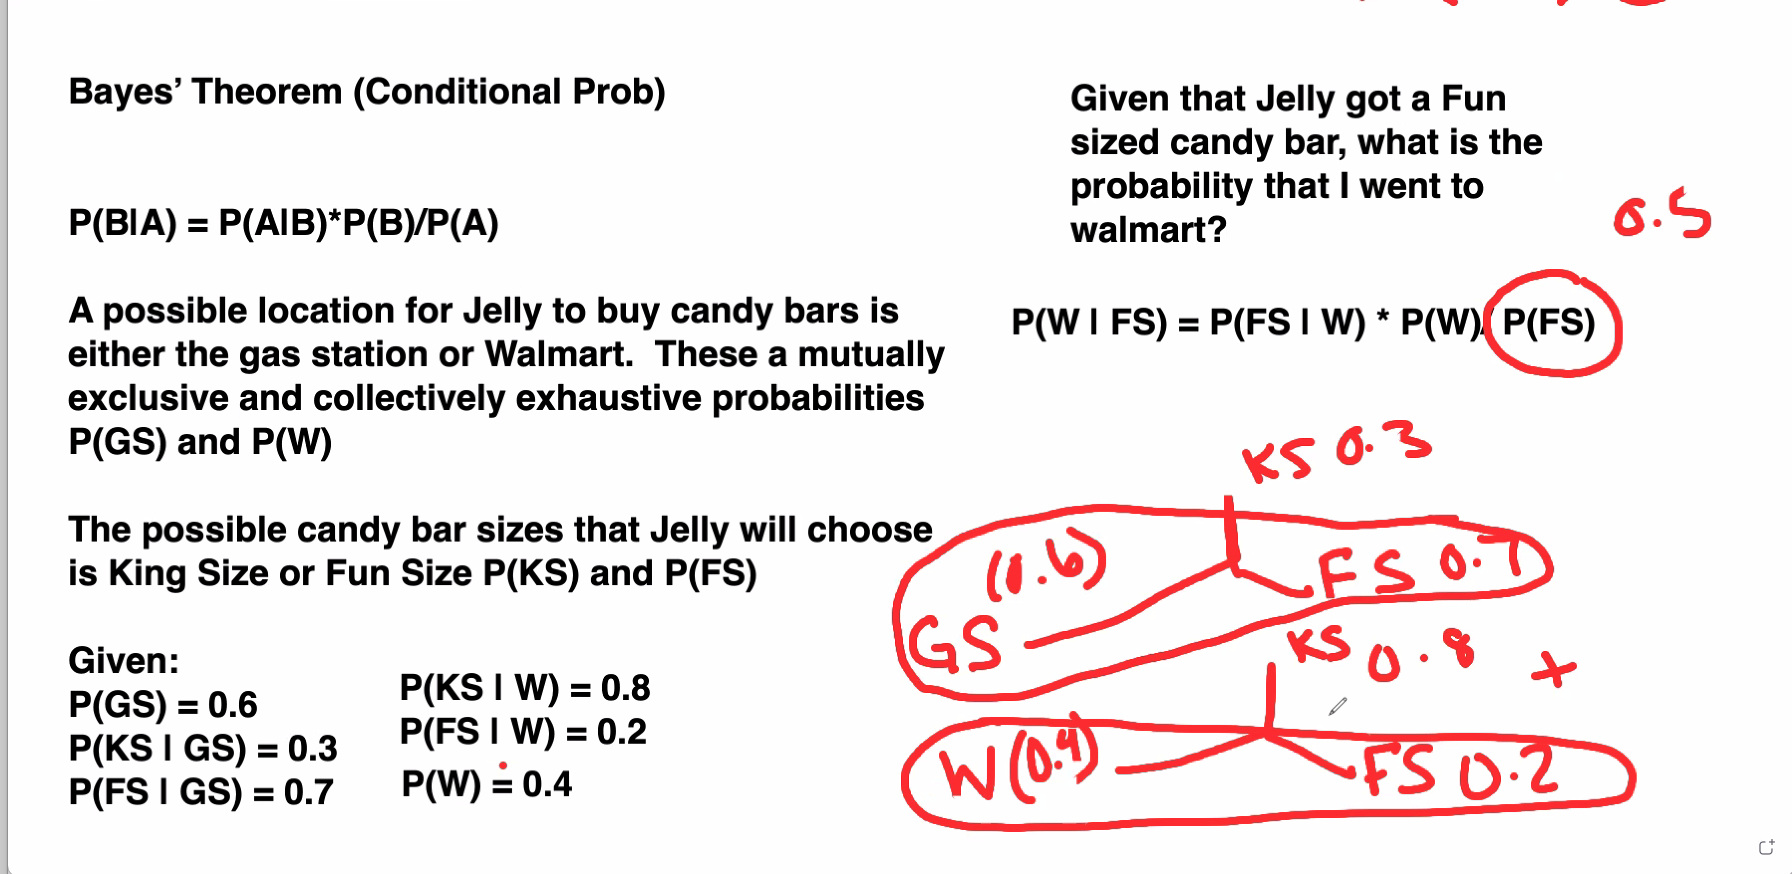



## Visually Explore Data for Linear Regression


In [ ]:
import seaborn as sns

# Make a pairplot using seaborn to examine the relationships between variables
# Note - do this on the whole dataframe, not just independent variables

sns.pairplot(df)
plt.show()

In [ ]:
# Create a correlation heatmap as well, with seaborn plus the 'corr' function
# Use .abs to grab the absolute value of the correlation

plt.figure(figsize=(8,6))
sns.heatmap(df.corr().abs(), annot=True)
plt.show()

## Linear Regression

1) import CSV into a DataFrame and view it. Example from Checkpoint: 

In [ ]:
import pandas as pd
df = pd.read_csv("ames.csv", index_col=0)
df = df[["SalePrice", "GrLivArea", "GarageArea", "LotArea", "LotFrontage"]].copy()

2) Build a Simple Linear Regression Using StatsModels:

    * *df.corr()['ColumnName'] helps find what features are most correlated with that 'ColumnName' see below for code things : 

In [ ]:
df.corr()["SalePrice"]

3) create and summarize simple linear regression model

the general structure of a StatsModels linear regression model is something like this:

* formula = 'y ~ x'
* model = ols(formula, df).fit()
* summary = model.summary()

simple_formula = ("column name ~ column name 2")

simple_model = ols(simple_forumla, data=df)

simple_model_summary = simple_model.summary



4) Interpret Simple Linear Regression Model

Interpret Simple Linear Regression Model Metrics - simple_model.summary() will print results

* R_squared is on the upper right of the results. this tells you how related the independent and dependent variables
* is the model statistically significant at alpha - .05? determined by comparing probabiliy of the f-statistic to the alpha. 
    * if the f stat is smaller than .05 we can say that the linear regression models something and there is some kind of relationship between the variables
    * If the f stat is bigger than the alpha we’d start the model is pointless basically
* y = mx + b (see picture below)
    * m = slope - "for every increase in unit of measurement, we increase by one"
    * b = coefficient of intercept 
    

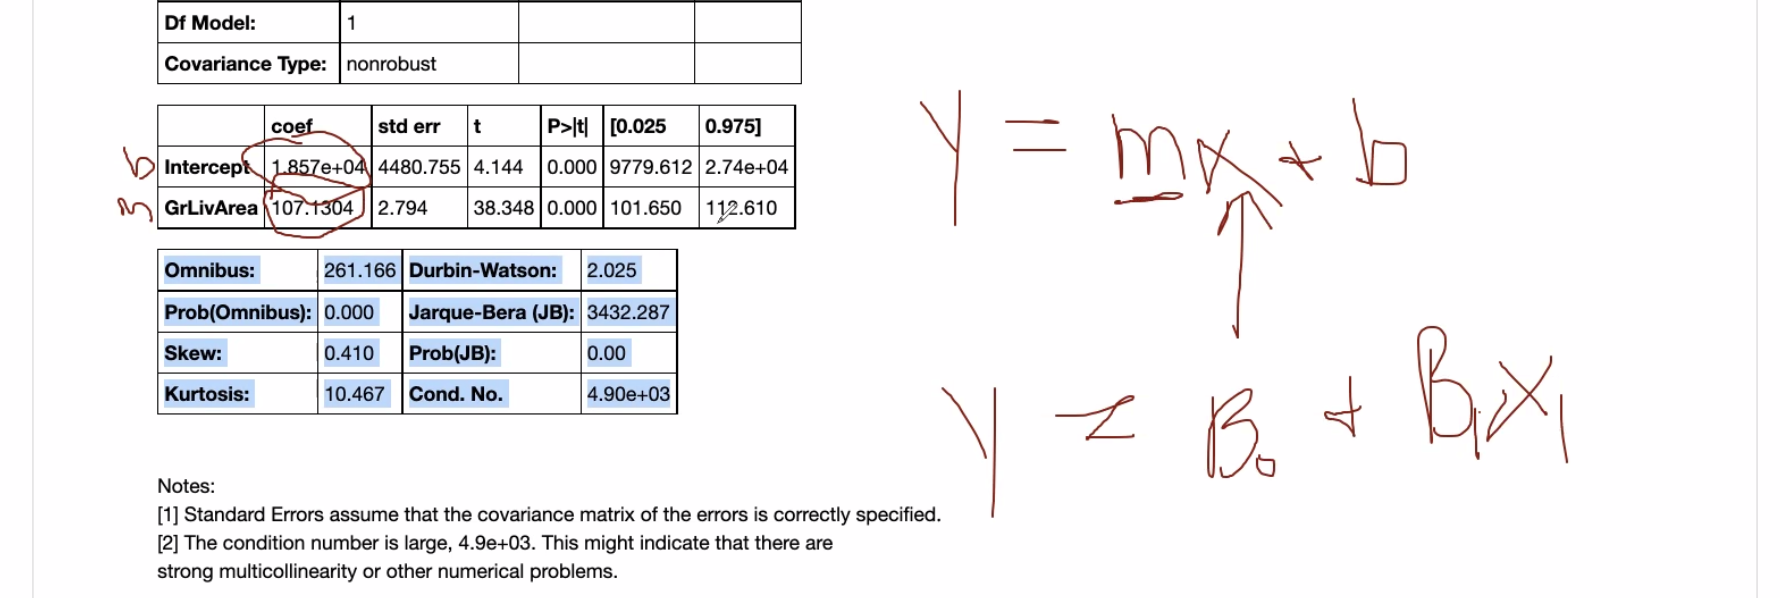